In [1]:
#imports

import numpy as np
import pandas as pd
from pandas import get_dummies
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

**Reading date from file**

In [2]:
df = pd.read_csv("marketing_campaign.csv",sep= '\t')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)

**A quick look at the data and it characteristics**

In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


**Checking for missing values**

In [6]:
missing_values = df.isna().sum().to_dict()
missing_values

{'ID': 0,
 'Year_Birth': 0,
 'Education': 0,
 'Marital_Status': 0,
 'Income': 24,
 'Kidhome': 0,
 'Teenhome': 0,
 'Dt_Customer': 0,
 'Recency': 0,
 'MntWines': 0,
 'MntFruits': 0,
 'MntMeatProducts': 0,
 'MntFishProducts': 0,
 'MntSweetProducts': 0,
 'MntGoldProds': 0,
 'NumDealsPurchases': 0,
 'NumWebPurchases': 0,
 'NumCatalogPurchases': 0,
 'NumStorePurchases': 0,
 'NumWebVisitsMonth': 0,
 'AcceptedCmp3': 0,
 'AcceptedCmp4': 0,
 'AcceptedCmp5': 0,
 'AcceptedCmp1': 0,
 'AcceptedCmp2': 0,
 'Complain': 0,
 'Z_CostContact': 0,
 'Z_Revenue': 0,
 'Response': 0}

#### **There are 24 missing values in 'Income' which we will drop**

In [7]:
df = df.dropna()

In [8]:
df.shape

(2216, 29)

#### **Adding and modifying features**

In [9]:

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
print("The latest record on customer's enrollment:", max(df['Dt_Customer']).date())


The latest record on customer's enrollment: 2014-12-06


In [10]:
# finding age of the customer from 2015 as the last enrollment of the customer is December 6th 2014 
df['Age'] = 2022 - df['Year_Birth']
#finding unique values for education
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

#### **Narrowing Education down to only 3 categories**

In [11]:
df['Education'] = df['Education'].replace({'Graduation': 'Graduate', 'PhD': 'Postgraduate', 'Master': 'Postgraduate', '2n Cycle': 'Postgraduate', 'Basic': 'Undergraduate'})

In [12]:
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [13]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Expenses
0,5524,1957,Graduate,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,3,11,1,65,1617
1,2174,1954,Graduate,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,3,11,0,68,27
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,57,776
3,6182,1984,Graduate,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,3,11,0,38,53
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,41,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,3,11,0,55,1341
2236,4001,1946,Postgraduate,Together,64014.0,2,1,2014-10-06,56,406,...,0,0,1,0,0,3,11,0,76,444
2237,7270,1981,Graduate,Divorced,56981.0,0,0,2014-01-25,91,908,...,1,0,0,0,0,3,11,0,41,1241
2238,8235,1956,Postgraduate,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,3,11,0,66,843


In [14]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

#### **Narrowing down marital Status from 8 to 2 categories i.e Partner and single**

In [15]:
df['Marital_Status'] = df['Marital_Status'].replace({'Single': 'Single', 'Together': 'Partner','Married': 'Partner', 'Divorced':'Single','Widow':'Single','Alone':'Single','Absurd':'Single','YOLO':'Single'})

In [16]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Expenses
0,5524,1957,Graduate,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,3,11,1,65,1617
1,2174,1954,Graduate,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,3,11,0,68,27
2,4141,1965,Graduate,Partner,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,57,776
3,6182,1984,Graduate,Partner,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,3,11,0,38,53
4,5324,1981,Postgraduate,Partner,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,41,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Partner,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,3,11,0,55,1341
2236,4001,1946,Postgraduate,Partner,64014.0,2,1,2014-10-06,56,406,...,0,0,1,0,0,3,11,0,76,444
2237,7270,1981,Graduate,Single,56981.0,0,0,2014-01-25,91,908,...,1,0,0,0,0,3,11,0,41,1241
2238,8235,1956,Postgraduate,Partner,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,3,11,0,66,843


In [17]:
# Merging Kidhome and Teenhome making it into one Feature of total Children
df['Children'] = df['Kidhome'] + df['Teenhome']
df.drop('Kidhome', axis=1, inplace=True)
df.drop('Teenhome', axis=1, inplace=True)

In [18]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Expenses,Children
0,5524,1957,Graduate,Single,58138.0,2012-04-09,58,635,88,546,...,0,0,0,0,3,11,1,65,1617,0
1,2174,1954,Graduate,Single,46344.0,2014-08-03,38,11,1,6,...,0,0,0,0,3,11,0,68,27,2
2,4141,1965,Graduate,Partner,71613.0,2013-08-21,26,426,49,127,...,0,0,0,0,3,11,0,57,776,0
3,6182,1984,Graduate,Partner,26646.0,2014-10-02,26,11,4,20,...,0,0,0,0,3,11,0,38,53,1
4,5324,1981,Postgraduate,Partner,58293.0,2014-01-19,94,173,43,118,...,0,0,0,0,3,11,0,41,422,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Partner,61223.0,2013-06-13,46,709,43,182,...,0,0,0,0,3,11,0,55,1341,1
2236,4001,1946,Postgraduate,Partner,64014.0,2014-10-06,56,406,0,30,...,0,1,0,0,3,11,0,76,444,3
2237,7270,1981,Graduate,Single,56981.0,2014-01-25,91,908,48,217,...,0,0,0,0,3,11,0,41,1241,0
2238,8235,1956,Postgraduate,Partner,69245.0,2014-01-24,8,428,30,214,...,0,0,0,0,3,11,0,66,843,1


In [19]:
df.describe()

,ID,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Expenses,Children
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271,53.179603,607.075361,0.947202
std,3249.376275,11.985554,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417,11.985554,602.900476,0.749062
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,26.000000,5.000000,0.000000
25%,2814.750000,1959.000000,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,45.000000,69.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,52.000000,396.500000,1.000000
75%,8421.750000,1977.000000,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,63.000000,1048.000000,1.000000
max,11191.000000,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,129.000000,2525.000000,3.000000


#### **We can observe that Age and Income might have some outliers as their max value is way greater than the upper Quartile**

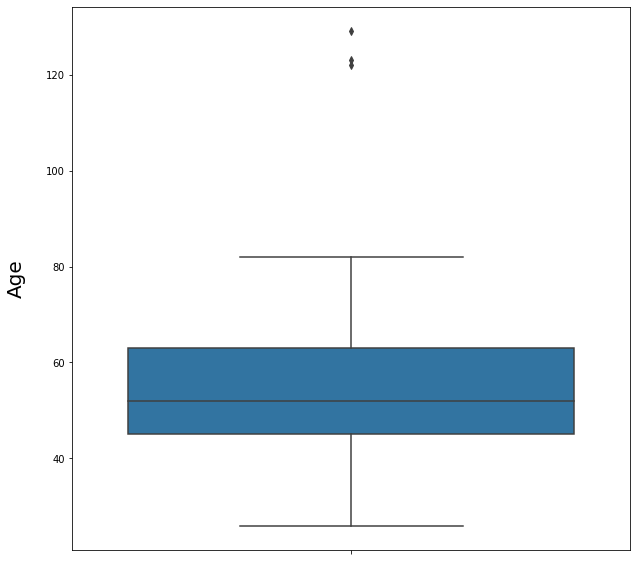

In [20]:
# Plotting Age
plt.figure(figsize=(10,10))
sns.boxplot(y=df.Age);
plt.ylabel('Age', fontsize=20, labelpad=20);

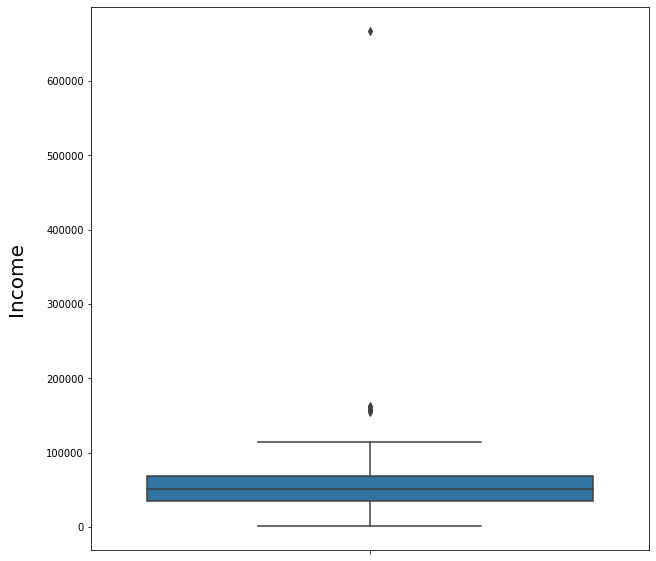

In [21]:
# Plotting Income
plt.figure(figsize=(10,10))
sns.boxplot(y=df.Income);
plt.ylabel('Income', fontsize=20, labelpad=20);

#### **There are a few Customers whose age is more than 100 and few customers having more than 600000 which can be considered as Outliers.**

In [22]:
df = df[df.Age<100]
df = df[df.Income<600000]

In [23]:
df['Marital_Status'] = df['Marital_Status'].astype(str)

for i in df['Marital_Status'].unique():
    print(i, df[df['Marital_Status'] == i].shape[0])

Single 784
Partner 1428


In [24]:
df['Dt_customer'] = pd.to_datetime(df['Dt_Customer'])

In [25]:
df['Education'] = df['Education'].astype(str)

for i in df['Education'].unique():
    print(i, df[df['Education'] == i].shape[0])

Graduate 1115
Postgraduate 1043
Undergraduate 54


**Categorizing the time spent as customers**

In [26]:
def time_based_year(x):
    if x <= pd.to_datetime('2012-12-12'):
        return 'Old_Customer'
    elif x <= pd.to_datetime('2013-12-12') and x > pd.to_datetime('2012-12-12'):
        return 'Average_Customer'
    else:
        return 'New_Customer'

In [27]:
df['Customer_time_spent'] = df['Dt_Customer'].apply(time_based_year)

In [28]:
df['Customer_time_spent']

0           Old_Customer
1           New_Customer
2       Average_Customer
3           New_Customer
4           New_Customer
              ...       
2235    Average_Customer
2236        New_Customer
2237        New_Customer
2238        New_Customer
2239        Old_Customer
Name: Customer_time_spent, Length: 2212, dtype: object

In [29]:
#categorical data
categorical_cols = ['Education', 'Marital_Status', 'Customer_time_spent'] 

#import pandas as pd
df_final = pd.get_dummies(df, columns = categorical_cols)

In [30]:
df_final.head()

,ID,Year_Birth,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Children,Dt_customer,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Marital_Status_Partner,Marital_Status_Single,Customer_time_spent_Average_Customer,Customer_time_spent_New_Customer,Customer_time_spent_Old_Customer
0,5524,1957,58138.0,2012-04-09,58,635,88,546,172,88,...,0,2012-04-09,1,0,0,0,1,0,0,1
1,2174,1954,46344.0,2014-08-03,38,11,1,6,2,1,...,2,2014-08-03,1,0,0,0,1,0,1,0
2,4141,1965,71613.0,2013-08-21,26,426,49,127,111,21,...,0,2013-08-21,1,0,0,1,0,1,0,0
3,6182,1984,26646.0,2014-10-02,26,11,4,20,10,3,...,1,2014-10-02,1,0,0,1,0,0,1,0
4,5324,1981,58293.0,2014-01-19,94,173,43,118,46,27,...,1,2014-01-19,0,1,0,1,0,0,1,0


In [32]:
to_drop = ["Z_CostContact", "ID"]
df_final = df_final.drop(to_drop, axis=1)

In [33]:
df_final.drop('Dt_customer', axis=1, inplace=True)

In [34]:
scaler = MinMaxScaler()
df_final[['Income', 'Age', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
          'MntSweetProducts', 'MntGoldProds']] = scaler.fit_transform(df_final[['Income', 'Age', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
          'MntSweetProducts', 'MntGoldProds']])


In [35]:
df_final.drop('Dt_Customer', axis=1, inplace=True)

In [36]:
df_final.head()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Expenses,Children,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Marital_Status_Partner,Marital_Status_Single,Customer_time_spent_Average_Customer,Customer_time_spent_New_Customer,Customer_time_spent_Old_Customer
0,1957,0.351086,0.585859,0.425318,0.442211,0.316522,0.664093,0.335878,0.274143,3,...,1617,0,1,0,0,0,1,0,0,1
1,1954,0.277680,0.383838,0.007368,0.005025,0.003478,0.007722,0.003817,0.018692,2,...,27,2,1,0,0,0,1,0,1,0
2,1965,0.434956,0.262626,0.285332,0.246231,0.073623,0.428571,0.080153,0.130841,1,...,776,0,1,0,0,1,0,1,0,0
3,1984,0.155079,0.262626,0.007368,0.020101,0.011594,0.038610,0.011450,0.015576,2,...,53,1,1,0,0,1,0,0,1,0
4,1981,0.352051,0.949495,0.115874,0.216080,0.068406,0.177606,0.103053,0.046729,5,...,422,1,0,1,0,1,0,0,1,0


#**Modeling**

Reducing the dimensionality 

In [37]:
df_final.shape

(2212, 33)

In [38]:
df_final.columns

Index(['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_Revenue', 'Response', 'Age', 'Expenses',
       'Children', 'Education_Graduate', 'Education_Postgraduate',
       'Education_Undergraduate', 'Marital_Status_Partner',
       'Marital_Status_Single', 'Customer_time_spent_Average_Customer',
       'Customer_time_spent_New_Customer', 'Customer_time_spent_Old_Customer'],
      dtype='object')

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(df_final)
df_pca = pca.transform(df_final)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca.head()

,PC1,PC2,PC3
0,1009.765093,9.555891,-0.098178
1,-580.249766,16.159012,3.071945
2,168.762808,3.659019,-2.859185
3,-554.313425,-13.856377,0.448185
4,-185.287238,-11.556077,-2.256388


In [40]:
var = list(pca.explained_variance_ratio_)
print(var)

[0.9995585875844268, 0.0003726043891085585, 2.19910592652594e-05]


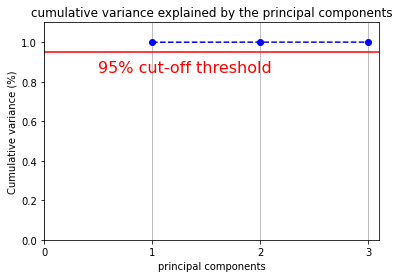

In [41]:
var = np.cumsum(pca.explained_variance_ratio_)
xi = np.arange(1, 4, step=1)
f,ax = plt.subplots()
plt.ylim(0.0,1.1)
plt.plot(xi, var, marker='o', linestyle='--', color='b')
plt.title("cumulative variance explained by the principal components")
ax.set_xlabel("principal components")
plt.xticks(np.arange(0, 4, step=1)) 
ax.set_ylabel('Cumulative variance (%)')
plt.axhline(y = 0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
ax.grid(axis='x')
plt.show()

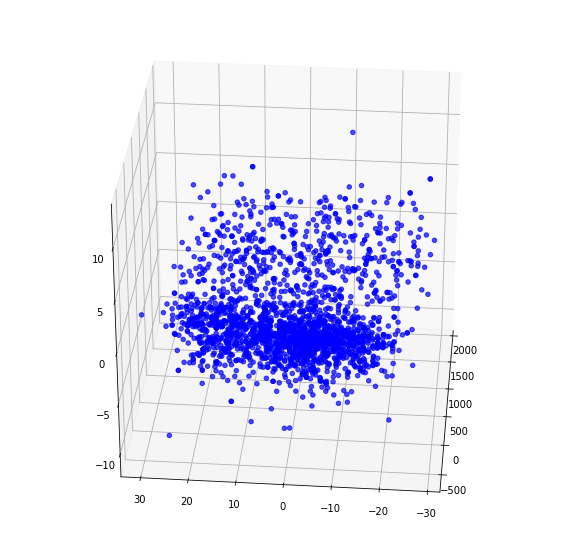

In [42]:
# Plotting the PCA data
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c='blue', cmap='rainbow', alpha=0.7, edgecolors='b', s=20)
ax.view_init(30, 185)
plt.show()


**Finding the numher of clusters**

In [43]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

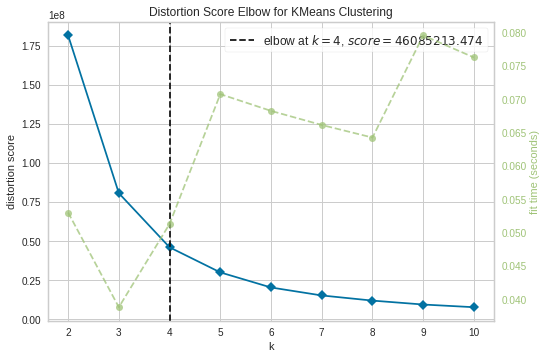

In [44]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=10)
visualizer.fit(df_pca)       
visualizer.show()  

**KMeans, Hierarchical clustering, dbscan, GMM**

In [45]:
k=4

In [46]:
# KMeans

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_pca)
df_pca['cluster'] = kmeans.labels_
df_pca.head()

,PC1,PC2,PC3,cluster
0,1009.765093,9.555891,-0.098178,1
1,-580.249766,16.159012,3.071945,2
2,168.762808,3.659019,-2.859185,0
3,-554.313425,-13.856377,0.448185,2
4,-185.287238,-11.556077,-2.256388,0


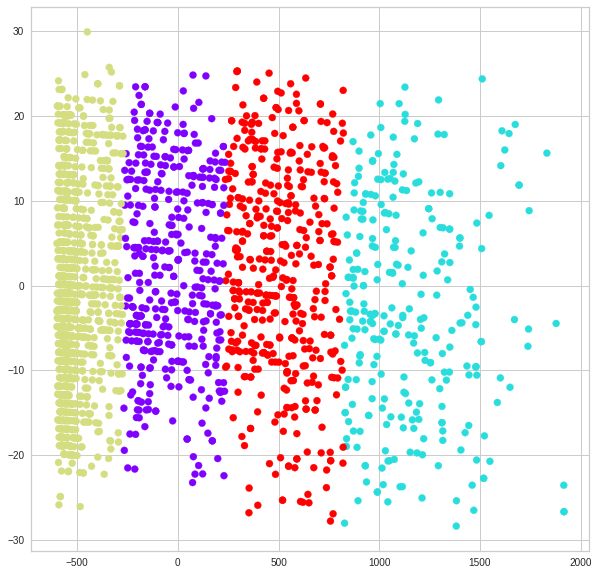

In [47]:
plt.figure(figsize=(10,10))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='rainbow')
plt.show()

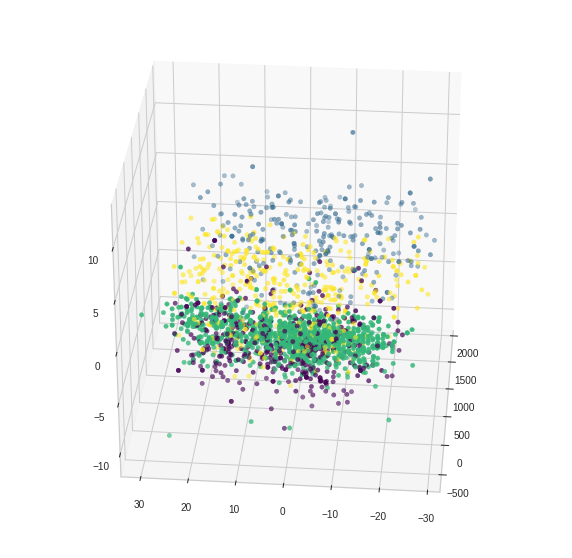

In [ ]:
# Plotting the clusters

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['cluster'], cmap='viridis', s=20)
ax.view_init(30, 185)
plt.show()

In [48]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [49]:
print('KMeans')
print('Silhouette Score: ', silhouette_score(df_pca, kmeans.labels_))
print('Calinski Harabasz Score: ', calinski_harabasz_score(df_pca, kmeans.labels_))
print('Davies Bouldin Score: ', davies_bouldin_score(df_pca, kmeans.labels_))

KMeans
Silhouette Score:  0.6458576979114078
Calinski Harabasz Score:  12088.185731268097
Davies Bouldin Score:  0.49584790377615773


In [50]:
# Hierarchical Clustering

from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=k)
agg.fit(df_pca)
df_pca['cluster'] = agg.labels_
df_pca.head()

,PC1,PC2,PC3,cluster
0,1009.765093,9.555891,-0.098178,0
1,-580.249766,16.159012,3.071945,3
2,168.762808,3.659019,-2.859185,2
3,-554.313425,-13.856377,0.448185,3
4,-185.287238,-11.556077,-2.256388,1


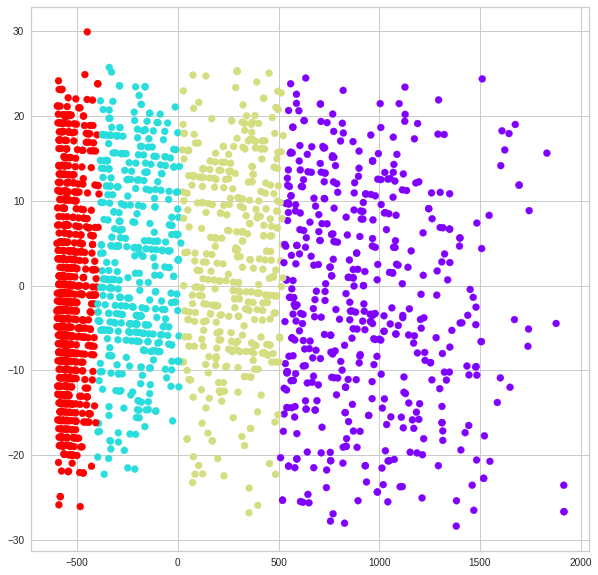

In [51]:
plt.figure(figsize=(10,10))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='rainbow')
plt.show()

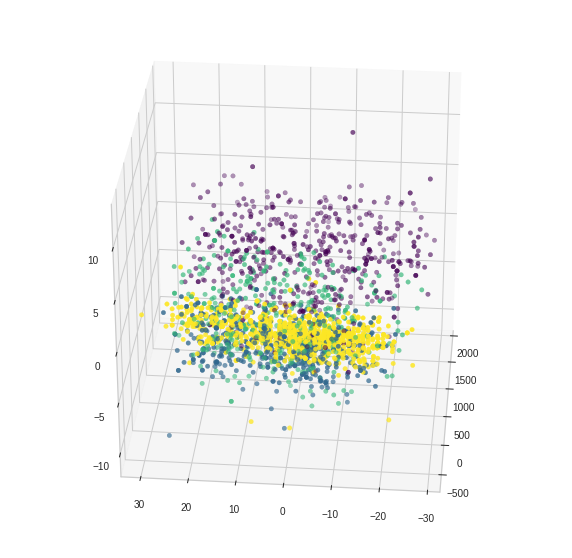

In [52]:
# Plotting the clusters

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['cluster'], cmap='viridis', s=20)
ax.view_init(30, 185)
plt.show()

In [53]:
print('Hierarchical')
print('Silhouette Score: ', silhouette_score(df_pca, agg.labels_))
print('Calinski Harabasz Score: ', calinski_harabasz_score(df_pca, agg.labels_))
print('Davies Bouldin Score: ', davies_bouldin_score(df_pca, agg.labels_))

Hierarchical
Silhouette Score:  0.6084330903295194
Calinski Harabasz Score:  8457.513924425857
Davies Bouldin Score:  0.5125025084044181


In [54]:
# DBSCAN

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=9)
dbscan.fit(df_pca)
df_pca['cluster'] = dbscan.labels_
df_pca.head()


,PC1,PC2,PC3,cluster
0,1009.765093,9.555891,-0.098178,-1
1,-580.249766,16.159012,3.071945,-1
2,168.762808,3.659019,-2.859185,-1
3,-554.313425,-13.856377,0.448185,-1
4,-185.287238,-11.556077,-2.256388,-1


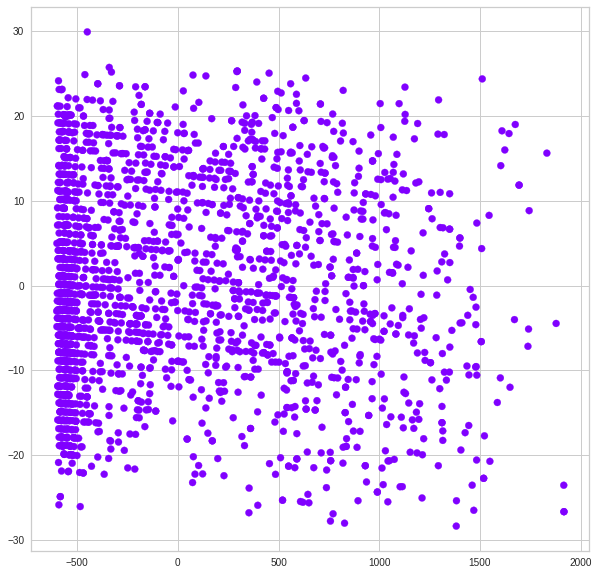

In [55]:
plt.figure(figsize=(10,10))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='rainbow')
plt.show()

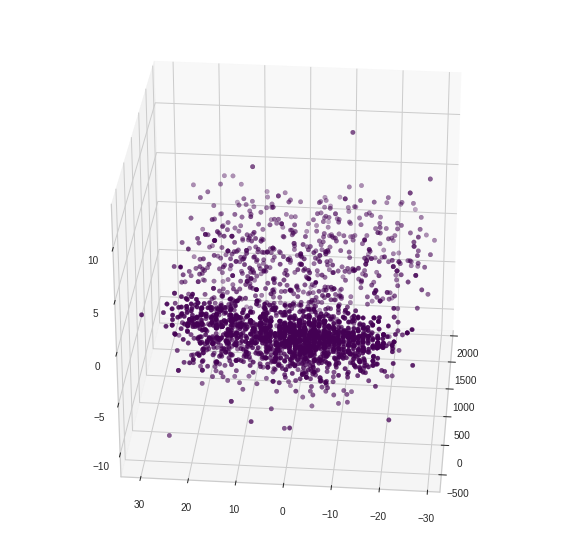

In [56]:
# Plotting the clusters

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['cluster'], cmap='viridis', s=20)
ax.view_init(30, 185)
plt.show()

In [60]:
try:
    print('Silhouette Score: ', silhouette_score(df_pca, dbscan.labels_))
    print('Calinski Harabasz Score: ', calinski_harabasz_score(df_pca, dbscan.labels_))
    print('Davies Bouldin Score: ', davies_bouldin_score(df_pca, dbscan.labels_))
except:
    print('Silhouette Score: Invalid Labels', 0)
    print('Calinski Harabasz Score: Invalid Labels', 0)
    print('Davies Bouldin Score: Invalid Labels', 0)

Silhouette Score: Invalid Labels 0
Calinski Harabasz Score: Invalid Labels 0
Davies Bouldin Score: Invalid Labels 0


In [61]:
# GMM based on k nearest neighbours

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=k)
gmm.fit(df_pca)
df_pca['cluster'] = gmm.predict(df_pca)
df_pca.head()


,PC1,PC2,PC3,cluster
0,1009.765093,9.555891,-0.098178,2
1,-580.249766,16.159012,3.071945,1
2,168.762808,3.659019,-2.859185,0
3,-554.313425,-13.856377,0.448185,1
4,-185.287238,-11.556077,-2.256388,3


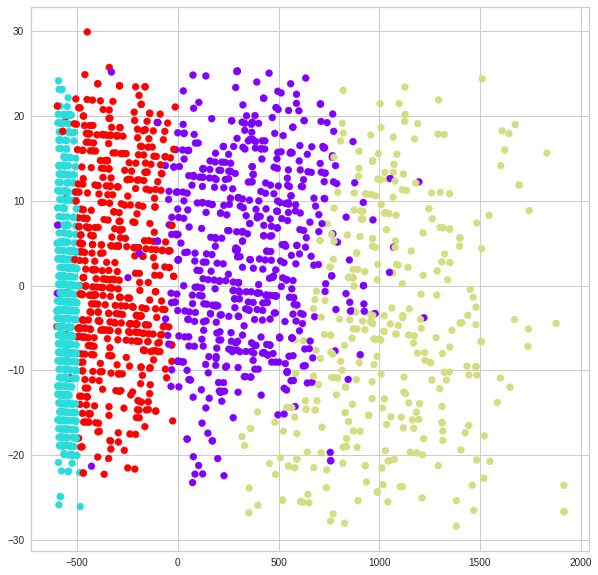

In [62]:
plt.figure(figsize=(10,10))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='rainbow')
plt.show()

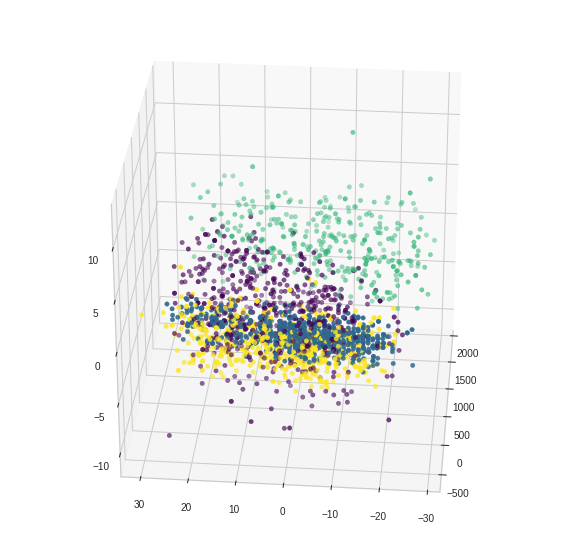

In [63]:
# Plotting the clusters

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['cluster'], cmap='viridis', s=20)
ax.view_init(30, 185)
plt.show()

In [64]:
print('GMM')
print('Silhouette Score: ', silhouette_score(df_pca, gmm.predict(df_pca)))
print('Calinski Harabasz Score: ', calinski_harabasz_score(df_pca, gmm.predict(df_pca)))
print('Davies Bouldin Score: ', davies_bouldin_score(df_pca, gmm.predict(df_pca)))

GMM
Silhouette Score:  0.4842837639885632
Calinski Harabasz Score:  6164.309333992986
Davies Bouldin Score:  0.626816677027777


In [65]:
# Apply Fast Clustering for KMeans from sklearn as Kmeans performed the best

from sklearn.cluster import MiniBatchKMeans

mbk = MiniBatchKMeans(init='k-means++', n_clusters=k, batch_size=100,
                        n_init=10, max_no_improvement=10, verbose=0)
mbk.fit(df_pca)
df_pca['cluster'] = mbk.labels_
df_final['cluster'] = mbk.labels_
df_pca.head()

,PC1,PC2,PC3,cluster
0,1009.765093,9.555891,-0.098178,2
1,-580.249766,16.159012,3.071945,1
2,168.762808,3.659019,-2.859185,3
3,-554.313425,-13.856377,0.448185,1
4,-185.287238,-11.556077,-2.256388,3


In [66]:
print(mbk.labels_)

[2 1 3 ... 0 3 1]


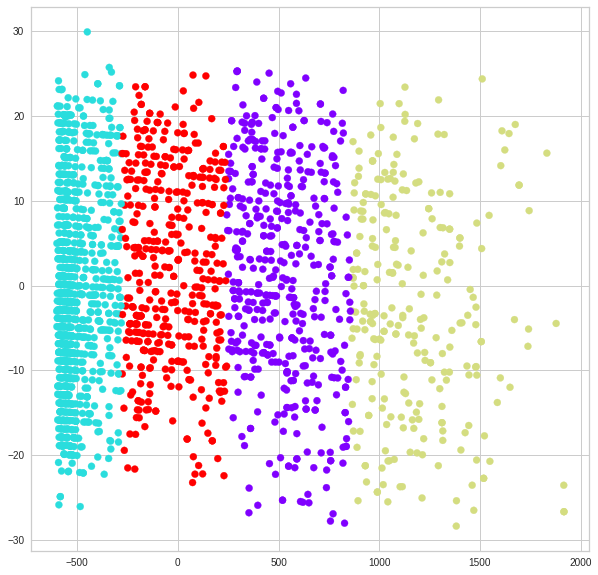

In [67]:
# plot in 2d

plt.figure(figsize=(10,10))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='rainbow')
plt.show()

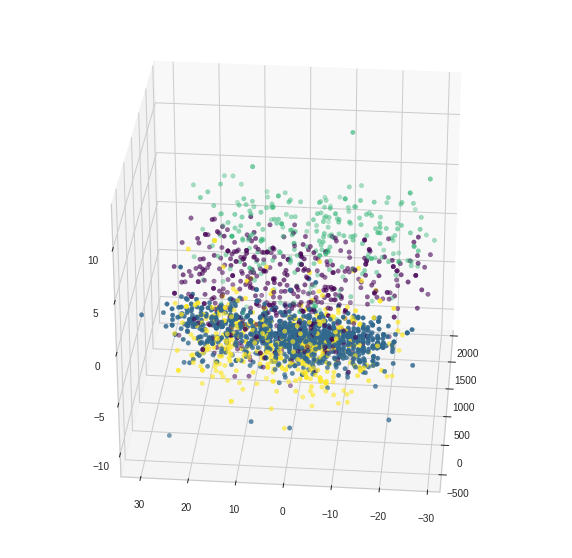

In [68]:
# Plotting the clusters

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['cluster'], cmap='viridis', s=20)
ax.view_init(30, 185)
plt.show()

In [69]:
# Check for the evaluation metrics for each model

print('KMeans')
print('Silhouette Score: ', silhouette_score(df_pca, mbk.labels_))
print('Calinski Harabasz Score: ', calinski_harabasz_score(df_pca, mbk.labels_))
print('Davies Bouldin Score: ', davies_bouldin_score(df_pca, mbk.labels_))

KMeans
Silhouette Score:  0.6445353122041589
Calinski Harabasz Score:  12053.693297749025
Davies Bouldin Score:  0.4964557253507839


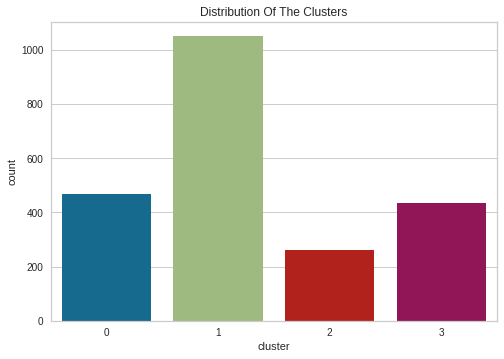

In [70]:
pl = sns.countplot(x=df_pca["cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 74.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


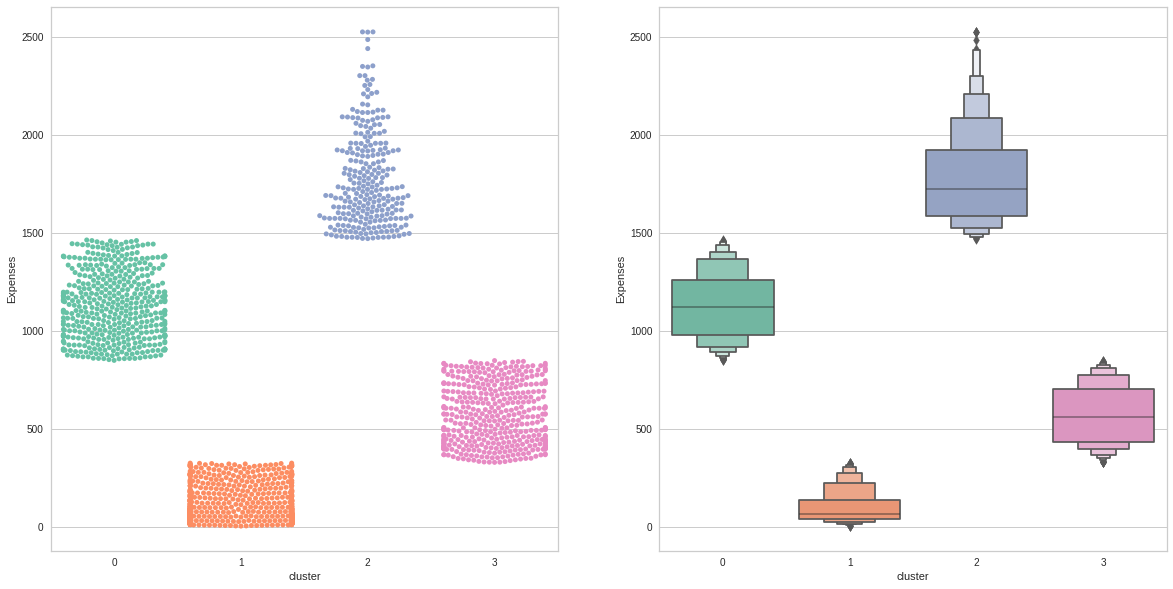

In [71]:
# Plot swarmplot and boxenplot for the clusters
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.swarmplot(x=df_final["cluster"], y=df_final["Expenses"], palette="Set2")
plt.subplot(1,2,2)
sns.boxenplot(x=df_final["cluster"], y=df_final["Expenses"], palette="Set2")
plt.show()

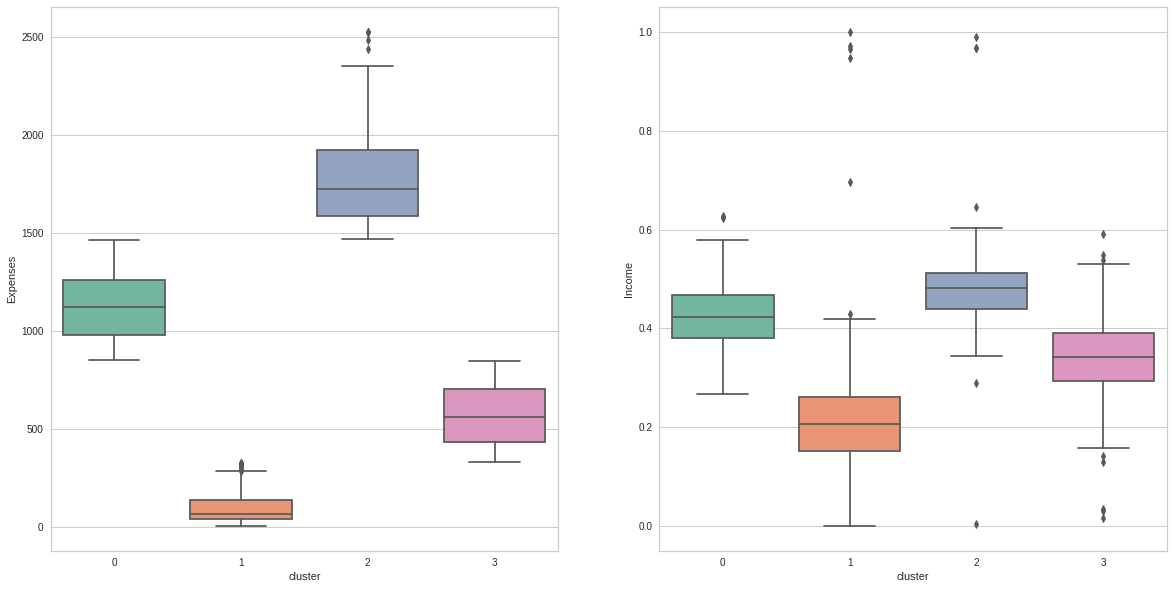

In [72]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(x=df_final["cluster"], y=df_final["Expenses"], palette="Set2")
plt.subplot(1,2,2)
sns.boxplot(x=df_final["cluster"], y=df_final["Income"], palette="Set2")
plt.show()

In [73]:
from tqdm import tqdm 
Collectible = [ "Children", "Age", "Marital_Status_Partner", "Marital_Status_Single", "Education_Graduate", "Education_Undergraduate", "Customer_time_spent_New_Customer", "Customer_time_spent_Old_Customer"]


<Figure size 576x396 with 0 Axes>

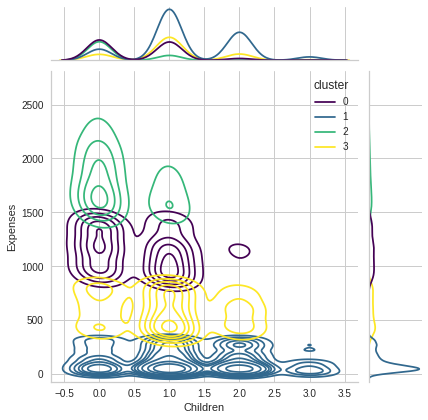

<Figure size 576x396 with 0 Axes>

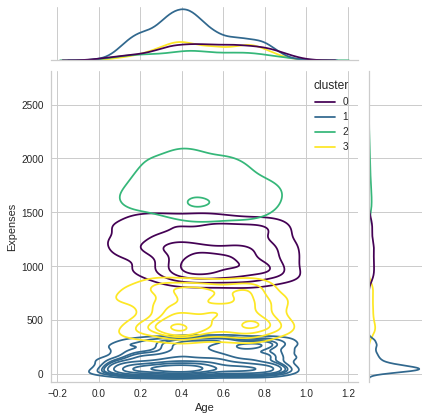

<Figure size 576x396 with 0 Axes>

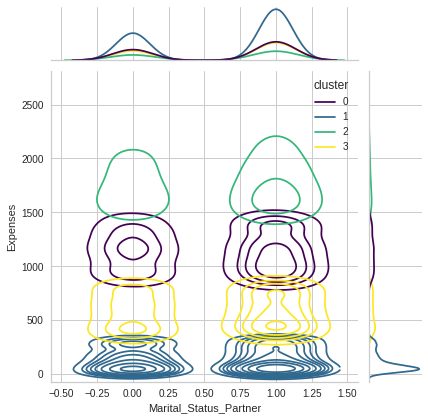

<Figure size 576x396 with 0 Axes>

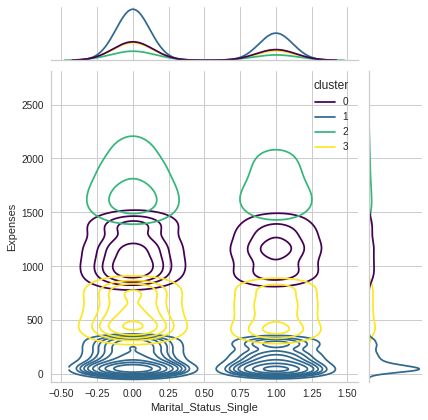

<Figure size 576x396 with 0 Axes>

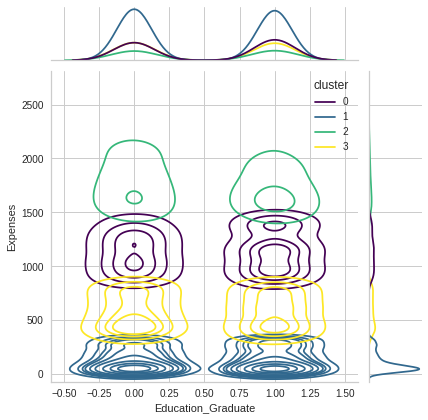

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

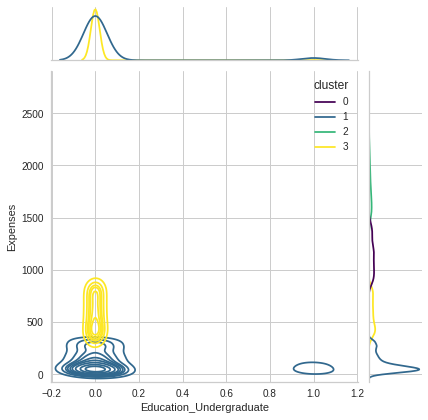

<Figure size 576x396 with 0 Axes>

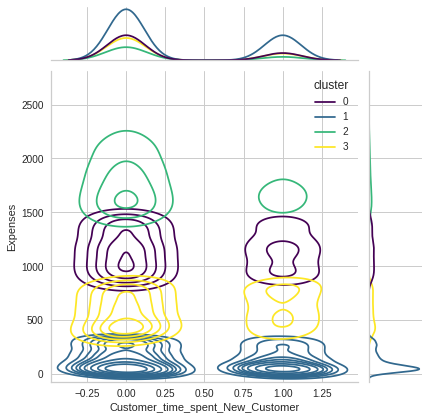

<Figure size 576x396 with 0 Axes>

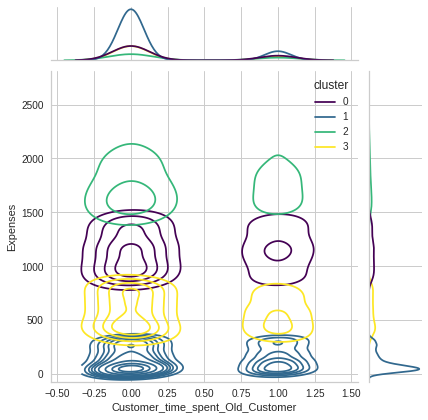

In [74]:
for i in Collectible:
    plt.figure()
    sns.jointplot(x=df_final[i], y=df_final["Expenses"], hue =df_final["cluster"], kind="kde", palette='viridis')
    plt.show()

**Representing the percentage contribution of each variable in each cluster**

In [75]:
df_profile = pd.DataFrame(columns=['cluster', 'variable', 'Mean_Column', 'percentage'])

# put all columns to this list
all_variables_list = df_final.columns.tolist()

# using mean; use appropriate summarization (median, count, etc.) for each feature
for i in range(k):
    for j in all_variables_list:
        df_profile = df_profile.append({'cluster': i
                                        , 'variable': j
                                        , 'Mean_Column': df_final[df_final['cluster'] == i][j].mean()
                                        , 'percentage': df_final[df_final['cluster'] == i][j].sum() / df_final[j].sum() * 100
                                       }, ignore_index=True)

df_profile

,cluster,variable,Mean_Column,percentage
0,0,Year_Birth,1966.226981,21.083307
1,0,Income,0.422717,28.546630
2,0,Recency,0.499643,21.303871
3,0,MntWines,0.379128,39.144316
4,0,MntFruits,0.265794,42.411703
...,...,...,...,...
131,3,Marital_Status_Single,0.348730,19.260204
132,3,Customer_time_spent_Average_Customer,0.551963,20.585702
133,3,Customer_time_spent_New_Customer,0.233256,16.666667
134,3,Customer_time_spent_Old_Customer,0.214781,20.898876


**Choosing Kmeans, tuning it and performing clutering in comparitively less time.**

In [76]:
# Apply Fast Clustering for KMeans from scratch without sklearn

from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

class MiniBatchKMeansScratch:
    def __init__(self, n_clusters=4, batch_size=100, max_iter=100, tol=0.0001):
        self.labels = None
        self.n_clusters = n_clusters
        self.batch_size = batch_size
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, X):
        self.centroids = X.sample(self.n_clusters).values
        self.labels = np.zeros(X.shape[0])
        self.inertia = np.inf
        for i in range(self.max_iter):
            batch = X.sample(self.batch_size)
            # distances =  cosine_similarity(batch, self.centroids)
            distances =  euclidean_distances(batch, self.centroids)
            labels = np.argmin(distances, axis=1)
            new_centroids = np.array([batch[labels == i].mean(axis=0) for i in range(self.n_clusters)])
            new_inertia = np.sum(np.min(distances, axis=1))
            if np.abs(self.inertia - new_inertia) < self.tol:
                break
            self.centroids = new_centroids
            # self.labels = labels
            if(len(self.labels) < 2213):
              self.labels = np.append(self.labels, labels)
              print(self.labels)
              print(len(self.labels[100:]))
            self.inertia = new_inertia

    def predict(self, X):
        distances = cosine_similarity(X, self.centroids)
        return np.argmin(distances, axis=1)

    def get_cluster_labels(self):
        return self.labels.astype(int)[100:]
        # return self.labels[100:]


In [77]:
# run when you get error for size on float64
df_pca = df_pca.drop(columns=['cluster'])

In [78]:
mbk = MiniBatchKMeans(n_clusters=k)
mbk.fit(df_pca)

MiniBatchKMeans(n_clusters=4)

In [79]:
df_pca['cluster'] = mbk.labels_
df_pca.head()

,PC1,PC2,PC3,cluster
0,1009.765093,9.555891,-0.098178,3
1,-580.249766,16.159012,3.071945,0
2,168.762808,3.659019,-2.859185,2
3,-554.313425,-13.856377,0.448185,0
4,-185.287238,-11.556077,-2.256388,0


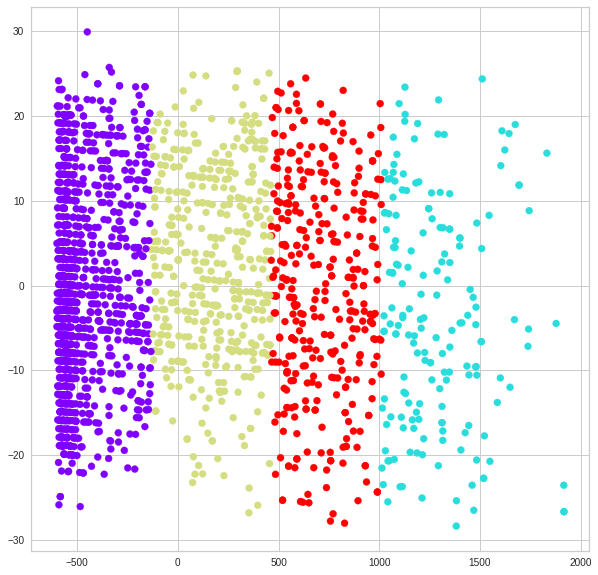

In [80]:
# plot in 2d

plt.figure(figsize=(10,10))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='rainbow')
plt.show()

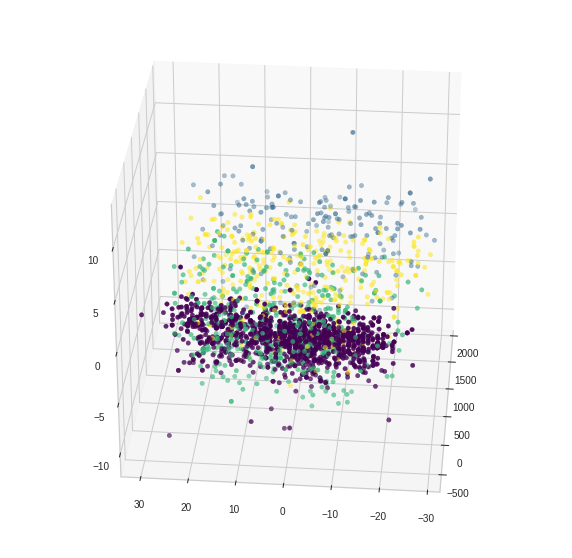

In [81]:
# Plotting the clusters

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['cluster'], cmap='viridis', s=20)
ax.view_init(30, 185)
plt.show()

In [82]:
# Check for the evaluation metrics for each model

print('Fast Clustering for KMeans based on Map Reduce and New cutting Method')
print('Silhouette Score: ', silhouette_score(df_pca, mbk.labels_))
print('Calinski Harabasz Score: ', calinski_harabasz_score(df_pca, mbk.labels_))
print('Davies Bouldin Score: ', davies_bouldin_score(df_pca, mbk.labels_))

Fast Clustering for KMeans based on Map Reduce and New cutting Method
Silhouette Score:  0.6358747354914034
Calinski Harabasz Score:  10502.954672306363
Davies Bouldin Score:  0.5162424031728133
